In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Week 1

- Larger datasets-> less scope of overfitting.
- Public datasets are messy and require quite a lot of data cleaning.

**Cats vs Dogs Dataset**

`Also, you may notice some warnings about missing or corrupt EXIF data as the images are being loaded into the model for training. Don't worry about this -- it won't impact your model! :)`

## Training with the cats vs. dogs dataset

In [2]:
# Import
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Instantiate
train_datagen = ImageDataGenerator(rescale=1./255) # rescale argument passed to normalize the images
train_dir = "./" # placeholder variable
train_generator = train_datagen.flow_from_directory( # create generator
                train_dir,
                target_size=(150,150), # resize while loading, won't need to resize in the code again
                batch_size=20, # validation batch size = 20 also
                class_mode='binary') # can be binary,

test_datagen = ImageDataGenerator(rescale=1./255)
validation_dir = "./"
validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='binary')

Found 17 images belonging to 4 classes.
Found 17 images belonging to 4 classes.


In [3]:
model = tf.keras.models.Sequential([
    # 3 sets of convolutions
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Dense part
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [5]:
# Training the ConvNet
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [8]:
history = model.fit(
    train_generator, # streams the image from the train directory
    steps_per_epoch=100, # total 2000 images, we set batch size=20
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50, # total 256 images, we set batch size=32, therefore we need 256/32=8 batches
    verbose=2)

Epoch 1/15
100/100 - 2s - loss: 0.5750 - accuracy: 0.0588 - val_loss: -6.3450e+01 - val_accuracy: 0.0588 - 2s/epoch - 16ms/step


`Since you have a relatively small number of training examples (2000), overfitting should be the number one concern. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions. For instance, if you, as a human, only see three images of people who are lumberjacks, and three images of people who are sailors, and among them the only person wearing a cap is a lumberjack, you might start thinking that wearing a cap is a sign of being a lumberjack as opposed to a sailor. You would then make a pretty lousy lumberjack/sailor classifier.`

**Code for two consecutive plots**
```python
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure() # Plot 1

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   ) # Plot 2
```

## Fixing through cropping

- Just by cropping the input image, we can get the required output in the case of a misclassification.
- Effect of cropping while training: 

# Week 2

- Image Augmentation and Data Augmentation- widely used to "artificially" increase the training dataset size.
- ImageDataGenerator from Tensorflow allows augmentation on-the-fly while loading the images (just-in-memory).

`Image Augmentation is a very simple, but very powerful tool to help you avoid overfitting your data. The concept is very simple though: If you have limited data, then the chances of you having data to match potential future predictions is also limited, and logically, the less data you have, the less chance you have of getting accurate predictions for data that your model hasn't yet seen. To put it simply, if you are training a model to spot cats, and your model has never seen what a cat looks like when lying down, it might not recognize that in future.`

`Augmentation simply amends your images on-the-fly while training using transforms like rotation. So, it could 'simulate' an image of a cat lying down by rotating a 'standing' cat by 90 degrees. As such you get a cheap way of extending your dataset beyond what you have already.`

`To learn more about Augmentation, and the available transforms, check out https://keras.io/api/layers/preprocessing_layers/ -- and note that it's referred to as preprocessing for a very powerful reason: that it doesn't require you to edit your raw images, nor does it amend them for you on-disk. It does it in-memory as it's performing the training, allowing you to experiment without impacting your dataset.`

## Coding augmentation with `ImageDataGenerator`

In [5]:
train_datagen = ImageDataGenerator(
            rescale=1./255, # rescaling is an example of augmentation
            rotation_range=40, # rotate from 0 to 40 degrees
            width_shift_range=0.2, # translate the subject around by upto 20% (x-axis)
            height_shift_range=0.2, # translate the subject around by upto 20% (y-axis)
            shear_range=0.2, # skewing along the x-axis upto 20 percent
            zoom_range=0.2, # zoom upto %
            horizontal_flip=True, # mirror-image
            fill_mode='nearest') # method to fill pixels that get lost by the operations

validation_datagen = ImageDataGenerator(rescale=1./255)

- Applying data augmentation requires good understanding of your dataset. Simply transforming it randomly will not always yield good results.
- Horses or Humans dataset: won't work well with added augmentation because of condiditions of the validation set images which can't be captured by the aforementioned augmentation preprocessing techniques.
- `The diversity of images is still too sparse and the validation set may also be poorly designed, namely that the type of image in it is too close to the images in the training set. If you inspect the data for yourself you'll see that's the case. For example, the humans are almost always standing up and in the center of the picture, in both the training and validation sets, so augmenting the image will change it to look like something that doesn't look like what's in the validation set.`

# Week 3

## Transfer Learning

- Consider somebody else's model, perhaps one that's far more sophisticated than yours, trained on a lot more data. They have convolutional layers and they're here intact with features that have already been learned. So you can lock them instead of retraining them on your data, and have those just extract the features from your data using the convolutions that they've already learned.
- Then you can take a model that has been trained on a very large datasets and use the convolutions that it learned when classifying its data.
- If you recall how convolutions are created and used to identify particular features, and the journey of a feature through the network, it makes sense to just use those, and then retrain the dense layers from that model with your data.
- Of course, well, it's typical that you might lock all the convolutions. You don't have to. You can choose to retrain some of the lower ones too because they may be too specialized for the images at hand. It takes some trial and error to discover the right combination. 

**Coding transfer learning from the Inception model**

In [6]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

In [7]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# local_weights_file = "path/to/weights.h5"

pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False, # Ignore the top fully connected layers at the top
                                weights = 'imagenet') # Set to none if we have offline weights

# pre_trained_model.load_weights(local_weights_files)

87910968/87910968 [==============================] - 5s 0us/step


In [8]:
for layer in pre_trained_model.layers:
    layer.trainable = False # Lock layers before training

In [9]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

**Adding DNN to the pre-trained model**

In [10]:
last_layer = pre_trained_model.get_layer('mixed7') # for 7x7 convolutions

last_output = last_layer.output

In [11]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizer = RMSprop(learning_rate=1e-4),
                loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

## Using Dropouts to prevent overfitting

`The idea behind it is to remove a random number of neurons in your neural network. This works very well for two reasons: The first is that neighboring neurons often end up with similar weights, which can lead to overfitting, so dropping some out at random can remove this. The second is that often a neuron can over-weigh the input from a neuron in the previous layer, and can over specialize as a result. Thus, dropping out can break the neural network out of this potential bad habit! `

In [12]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x) # Param: fraction of units to drop
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizer = RMSprop(learning_rate=1e-4),
                loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

**When you see validation diverging away from the training like this over time, it's actually a great candidate to try using a dropout.**
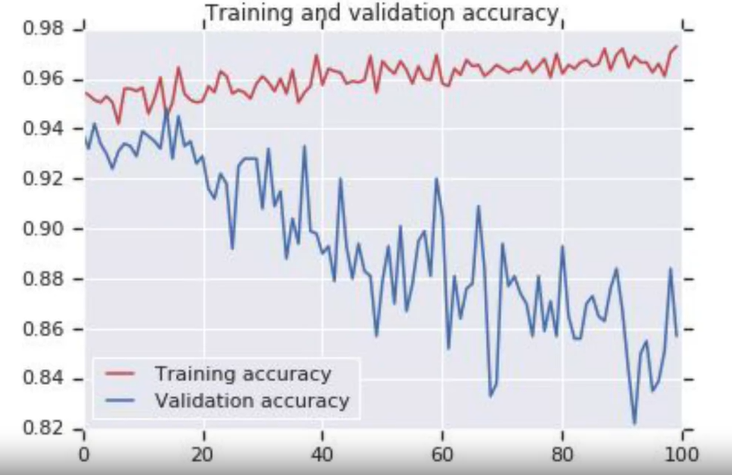
**After introducing dropout**
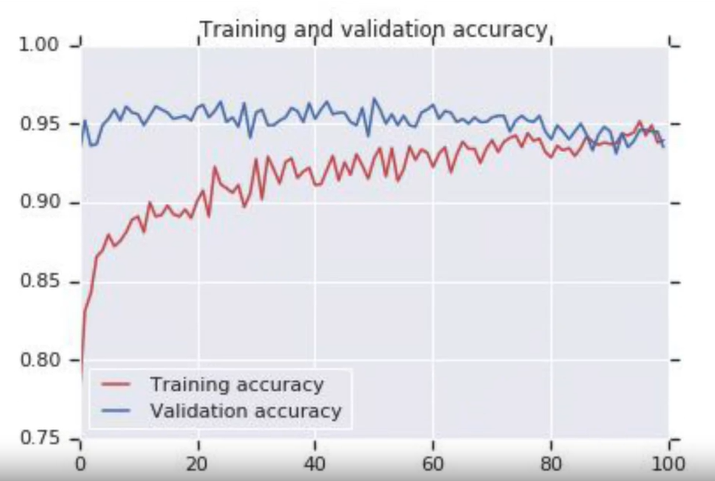

# Week 4

## Multiclass Classification

`ImageDataGenerator()` works with multiclass data and labels in a similar fashion.
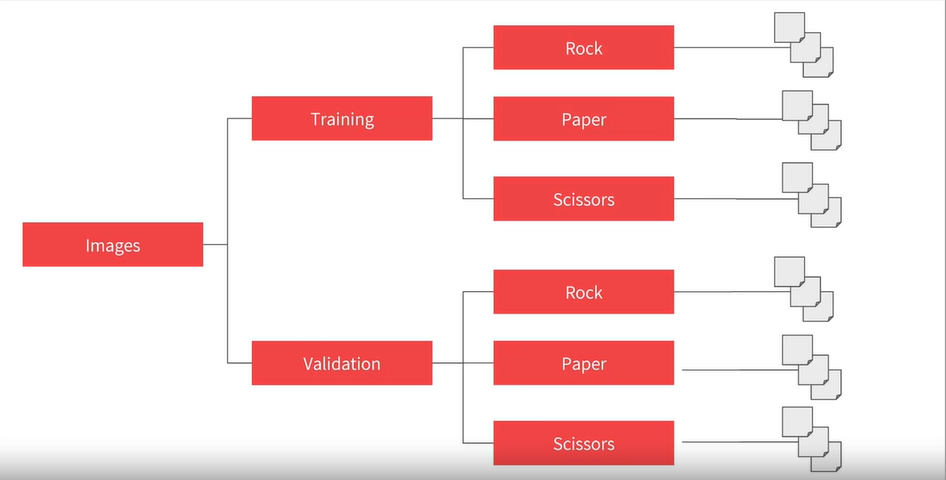

**Changes to ImageDataGenerator**

The `class_mode` parameter is changed from 'binary' to 'categorical'.

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "./" # placeholder variable

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(300,300),
                batch_size=128,
                class_mode='categorical')

Found 17 images belonging to 4 classes.


**Changes to the Keras model**

The output layer is changed with softmax activation.

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [16]:
model.compile(loss='categorical_crossnentropy', # loss function changed to categorical_crossentropy
             optimizer=RMSprop(learning_rate=1e-4),
             metrics=['accuracy'])